## Задание

Добейтесь на автокодировщике с 2-мерным скрытым пространством на 3-х цифрах: 0, 1 и 3 – ошибки MSE**<0.034** на скорости обучения **0.001** на **10-й эпохе**.

## Импорт библиотек


In [46]:
# Работа с операционной системой
import os

# Отрисовка графиков
import matplotlib.pyplot as plt

# Операции с путями
import glob

# Работа с массивами данных
import numpy as np

# Слои
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input, Conv2DTranspose, concatenate, Activation, MaxPooling2D, Conv2D, BatchNormalization, Concatenate

# Модель
from tensorflow.keras import Model

# Загрузка модели
from tensorflow.keras.models import load_model

# Датасет
from tensorflow.keras.datasets import mnist

# Оптимизатор для обучения модели
from tensorflow.keras.optimizers import Adam

# Коллбэки для выдачи информации в процессе обучения
from tensorflow.keras.callbacks import LambdaCallback

%matplotlib inline

## Утилиты

Удаление изображений. Применять при обучении новой модели, чтобы не было путаницы в картинках.

In [47]:
def clean():
  # Получение названий всех картинок
  paths = glob.glob('*.jpg')

  # Удаление всех картинок по полученным путям
  for p in paths:
    os.remove(p)

# Удаление всех картинок
clean()

## Загрузка данных

In [48]:
# Загрузка и подготовка данных
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = (X_train.astype('float32') / 255.).reshape(-1, 784)  # Формат (None, 784)
X_test = (X_test.astype('float32') / 255.).reshape(-1, 784)

# Выбор только цифр 0, 1, 3
numbers = [0, 1, 3]
mask = np.array([(i in numbers) for i in y_train])
X_train = X_train[mask]
y_train = y_train[mask]

## Создание модели и обучение

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Reshape, Conv2DTranspose, UpSampling2D, LeakyReLU, Dropout, GaussianNoise
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.regularizers import l2

Функция-коллбэк. Отрисовывает объекты в скрытом пространстве

In [50]:
def ae_on_epoch_end(epoch, logs):
    print('________________________')
    print(f'*** ЭПОХА: {epoch+1}, loss: {logs["loss"]} ***')
    print('________________________')

    # Получение картинки латентного пространства в конце эпохи и запись в файл
    # Задание числа пикселей на дюйм
    plt.figure(dpi=100)

    # Предсказание енкодера на тренировочной выборке
    predict = encoder.predict(X_train)

    # Создание рисунка: множество точек на плоскости 3-х цветов (3-х классов)
    scatter = plt.scatter(predict[:,0,],predict[:,1], c=y_train, alpha=0.6, s=5)

    # Создание легенды
    legend2 = plt.legend(*scatter.legend_elements(), loc='upper right', title='Классы')

    # Сохранение картинки с названием, которого еще нет
    paths = glob.glob('*.jpg')
    plt.savefig(f'image_{str(len(paths))}.jpg')

    # Отображение. Без него рисунок не отрисуется
    plt.show()

ae_callback = LambdaCallback(on_epoch_end=ae_on_epoch_end)

In [51]:
# Архитектура автокодировщика
input_img = Input(shape=(28, 28, 1))

In [52]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Размерность входных данных (784 = 28*28)
input_dim = 784
encoding_dim = 2  # 2D скрытое пространство

# Энкодер
input_layer = Input(shape=(input_dim,))
encoder_layer = Dense(128, activation='relu')(input_layer)
encoder_layer = Dense(64, activation='relu')(encoder_layer)
encoder_output = Dense(encoding_dim)(encoder_layer)

# Декодер
decoder_layer = Dense(64, activation='relu')(encoder_output)
decoder_layer = Dense(128, activation='relu')(decoder_layer)
decoder_output = Dense(input_dim, activation='sigmoid')(decoder_layer)

# Полная модель
autoencoder = Model(inputs=input_layer, outputs=decoder_output)
encoder = Model(inputs=input_layer, outputs=encoder_output)

# Компиляция
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

Epoch 1/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1135________________________
*** ЭПОХА: 1, loss: 0.074415422976017 ***
________________________
588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


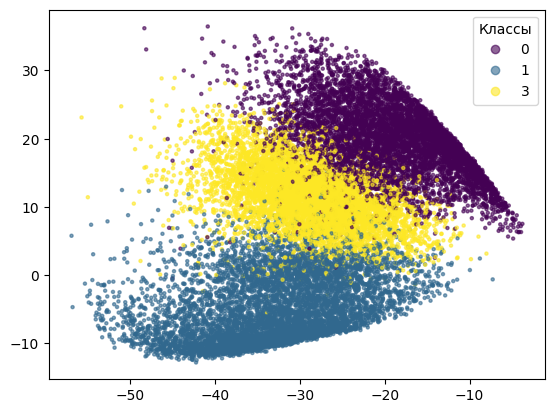

147/147 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1132 - val_loss: 0.0674
Epoch 2/10
142/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0432________________________
*** ЭПОХА: 2, loss: 0.041086163371801376 ***
________________________
588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


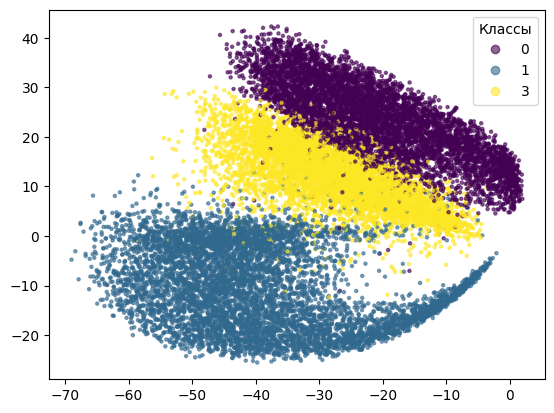

147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0431 - val_loss: 0.0646
Epoch 3/10
143/147 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0378________________________
*** ЭПОХА: 3, loss: 0.03735286742448807 ***
________________________
588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


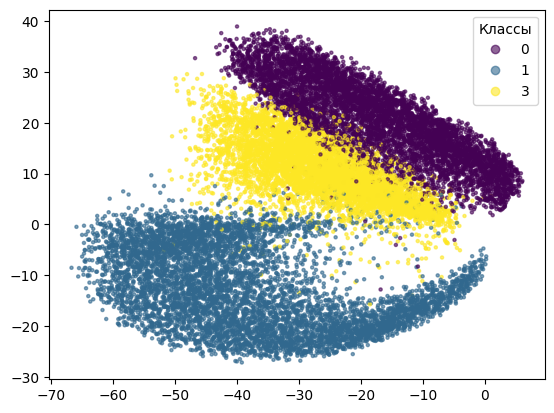

147/147 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0377 - val_loss: 0.0626
Epoch 4/10
139/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0365________________________
*** ЭПОХА: 4, loss: 0.03618459403514862 ***
________________________
588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


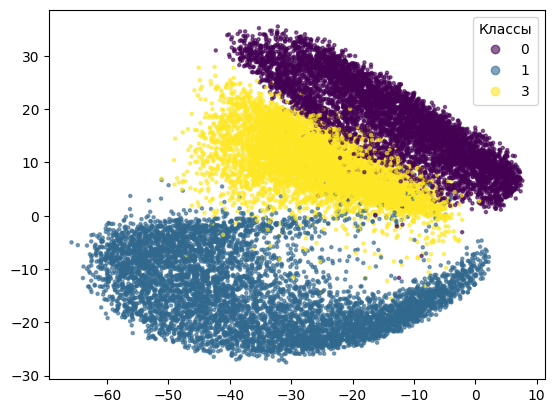

147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0365 - val_loss: 0.0616
Epoch 5/10
129/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0355________________________
*** ЭПОХА: 5, loss: 0.0353703647851944 ***
________________________
588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


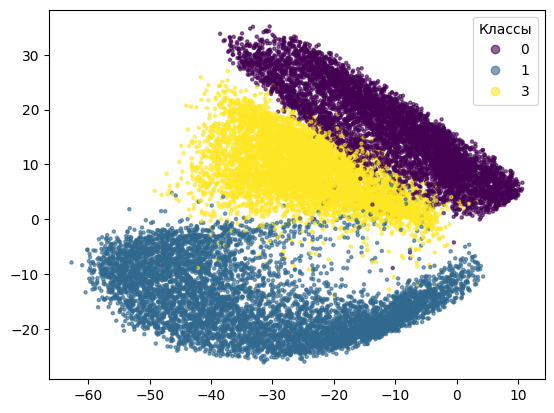

147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0355 - val_loss: 0.0599
Epoch 6/10
145/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0348________________________
*** ЭПОХА: 6, loss: 0.034534018486738205 ***
________________________
588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


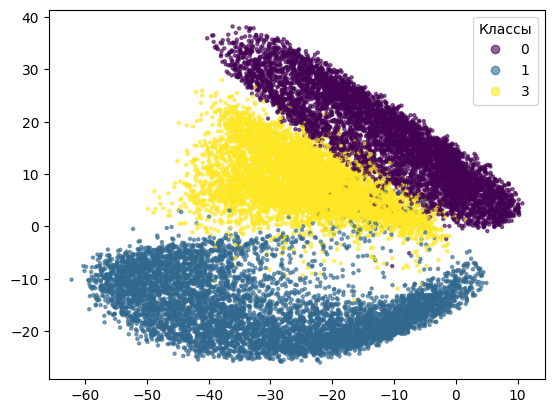

147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0348 - val_loss: 0.0586
Epoch 7/10
128/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0344________________________
*** ЭПОХА: 7, loss: 0.03393854573369026 ***
________________________
588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


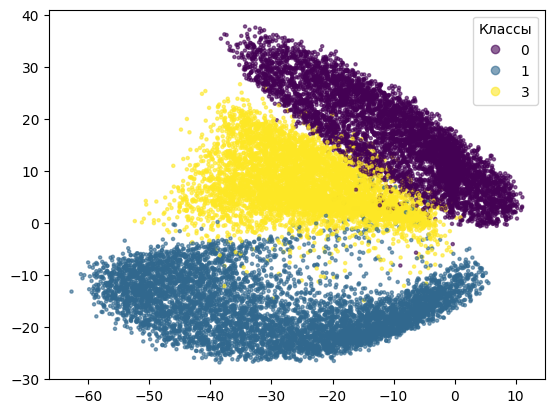

147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0343 - val_loss: 0.0575
Epoch 8/10
138/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0335________________________
*** ЭПОХА: 8, loss: 0.033510513603687286 ***
________________________
588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


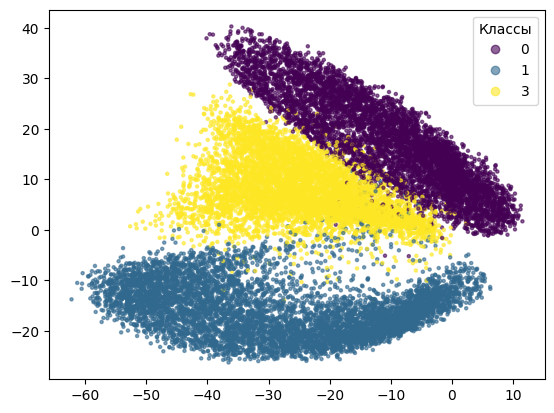

147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0335 - val_loss: 0.0570
Epoch 9/10
137/147 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0330________________________
*** ЭПОХА: 9, loss: 0.03316524252295494 ***
________________________
588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


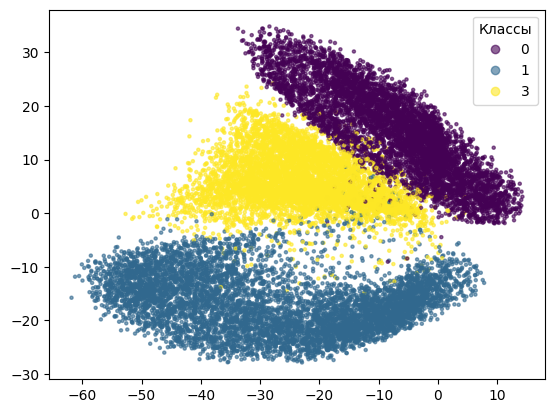

147/147 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0330 - val_loss: 0.0571
Epoch 10/10
129/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0331________________________
*** ЭПОХА: 10, loss: 0.032849278301000595 ***
________________________
588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


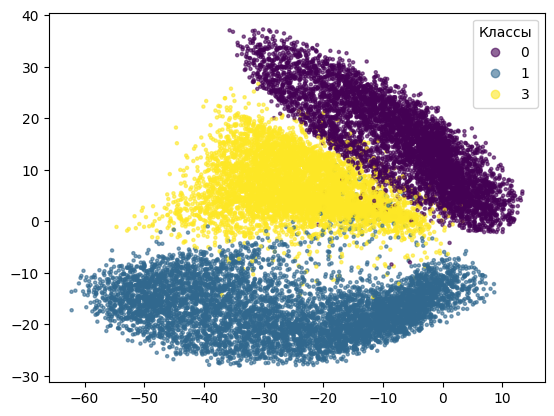

147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0331 - val_loss: 0.0569


In [53]:
history = autoencoder.fit(
    X_train, X_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_test, X_test),
    verbose=1,
    callbacks=[ae_callback]
)

In [54]:
print(f"Final Train MSE: {history.history['loss'][-1]:.5f}")
print(f"Final Val MSE: {history.history['val_loss'][-1]:.5f}")

Final Train MSE: 0.03285
Final Val MSE: 0.05690
